Investigación sobre los factores que influyen en la expansión urbana en México

Análisis de los datos para 135 ciudades para analizar las siguientes correlaciones:

- ¿Existe una correlación entre los subsidios federales y la expansión urbana?
- ¿Existe una correlación entre la tasa de motorización y la expansión urbana?
- ¿Existe una correlación entre aumento en el ingreso y la expansión urbana?
- ¿Existe una correlación entre restricciones a la densidad y la expansión urbana?
- ¿Existe una correlación entre el decrecimiento del tamaño familiar y la expansión urbana?

Datos históricos: 1980, 2000, 2005 y 2010

Objetivo: analizar la tendencia histórica lo más posible. 


El análisis nos permitirá no es solo comprobar la correlación sino identificar que tan poderosas son las variables sobre las que sí podemos tener control: __subsidios federales y restricciones a la densidad. 

In [1]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 


import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
#import mplleaflet
#import shapely.geometry as geom
import networkx as nx
import xlrd

Populating the interactive namespace from numpy and matplotlib


In [30]:
base = pd.read_csv('basedatos6b.csv')
base.columns

Index([u'orden reporte', u'zm_flag', u'nombre_zm', u'nombre_zm_match_sina',
       u'nombre_zm_match', u'estado', u'clasificacion', u'pob_1980',
       u'pob_2000', u'pob_2005', u'pob_2010', u'cambio_pob', u'area_1980',
       u'area_2000', u'area_2005', u'area_2010', u'cambio_area', u'sub_2015',
       u'sub_2010', u'normativa', u'remuneraciones_1980',
       u'remuneraciones_2000', u'remunera_2009', u'remunera_2014',
       u'autos_2014', u'autos_1980', u'tasamoto_1980', u'autos_2000',
       u'tasamoto_2000', u'autos_2005', u'tasamoto_2005', u'autos_2010',
       u'tasamoto_2010', u'tam_fam_1980', u'tam_fam_2000', u'tam_fam_2005',
       u'tam_fam_2010'],
      dtype='object')

In [31]:
base

,orden reporte,zm_flag,nombre_zm,nombre_zm_match_sina,nombre_zm_match,estado,clasificacion,pob_1980,pob_2000,pob_2005,...,autos_2000,tasamoto_2000,autos_2005,tasamoto_2005,autos_2010,tasamoto_2010,tam_fam_1980,tam_fam_2000,tam_fam_2005,tam_fam_2010
0,14,0,Aguascalientes,Aguascalientes,Aguascalientes,Aguascalientes,500mil - 1 millon,359454,727582,834498,...,159812,219.6480946,252345,302.3913778,338329,362.870280,NaN,NaN,4.080,3.900
1,6,0,Tijuana,Tijuana,Tijuana,Baja California,1 millon +,491797,1352035,1575026,...,321758,237.9805257,527091,334.6554279,432319,246.837727,NaN,NaN,3.850,3.660
2,51,0,Ensenada,Ensenada,Ensenada,Baja California,100mil - 500mil,120483,231241,268716,...,105983,458.3227023,156173,581.1823635,105767,366.486831,NaN,NaN,3.660,3.410
3,13,0,Mexicali,Mexicali,Mexicali,Baja California,500mil - 1 millon,510664,764602,855962,...,277569,363.0241616,422357,493.4296149,283741,302.874813,NaN,NaN,3.670,3.690
4,59,0,La Paz,La Paz,La Paz,Baja California Sur,100mil - 500mil,91453,162954,189176,...,88423,542.6255262,160376,847.7608153,195025,906.342656,NaN,NaN,3.650,3.470
5,102,0,San Jos� del Cabo,San Jose del Cabo,San Jos� del Cabo,Baja California Sur,50mil- 100mil,4369,38080,59325,...,40629,1066.938025,94182,1587.560051,194482,2222.956291,NaN,NaN,3.760,3.570
6,81,0,Cabo San Lucas,Cabo San Lucas,Cabo San Lucas,Baja California Sur,100mil - 500mil,4233,48143,87876,...,40629,843.9233118,94182,1071.760208,194482,1518.714323,NaN,NaN,3.760,3.570
7,57,0,Campeche,Campeche,Campeche,Campeche,100mil - 500mil,128434,190813,211671,...,34281,179.6575705,42017,198.501448,81826,357.834434,NaN,NaN,4.000,3.560
8,66,0,Ciudad del Carmen,Carmen,Carmen,Campeche,100mil - 500mil,72489,126024,154197,...,24577,195.0184092,32848,213.0261938,65124,384.289474,NaN,NaN,3.830,3.730
9,24,0,Tuxtla Guti�rrez,Tuxtla Gutierrez,Tuxtla Guti�rrez,Chiapas,500mil - 1 millon,196785,523482,610714,...,74323,141.9781387,101299,165.8697852,171631,250.865300,NaN,NaN,3.870,3.840


In [49]:
#setting up columns as variables to look at
#area in ha
area2010 = base['area_2010']
area2005 = base.area_2005
area2000 = base.area_2000
area1980 = base.area_1980

#population
pop2010 = base['pob_2010']
pop2005 = base.pob_2005
pop2000 = base.pob_2000
pop1980 = base.pob_1980

#rates of change
carea = base.cambio_area
cpop = base.cambio_pob

#motorization rate
moto1980 = base.tasamoto_1980
moto2000 = base.tasamoto_2000
moto2005 = base.tasamoto_2005
moto2010 = base.tasamoto_2010

#subisides
sub2010 = base.sub_2010

#motorization rate
fam2010 = base.tam_fam_2010
fam2005 = base.tam_fam_2005

#income
rem2009 = base.remunera_2009


In [50]:
#rem2009

# Exploratory analysis

In [58]:
print("% change area 1980-2010", carea.mean())
print("% change pop 1980-2010",cpop.mean())

% change area 1980-2010 11.5402319456
% change pop 1980-2010 4.40909498455


In [33]:
print("area 2010 min", area2010.min())
print("area 2010 max", area2010.max())

area 2010 min 841
area 2010 max 185291


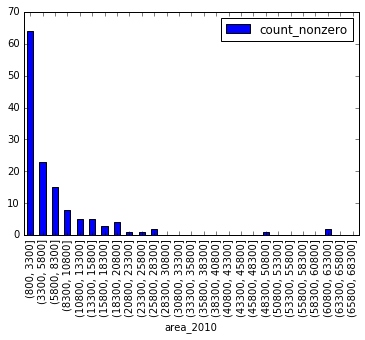

In [34]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(800, 70000, 2500)
area2010s = area2010.drop([19])
#area2010s.size
area2010s.groupby(pd.cut(area2010s, bins)).agg([count_nonzero]).plot(kind='bar')


In [35]:
print("area 2005 min", area2005.min())
print("area 2005 max", area2005.max())
area2005s = area2010.drop([19])
print("area 2005 max sin ZMVM", area2005s.max())


area 2005 min 689
area 2005 max 174616
area 2005 max sin ZMVM 63018


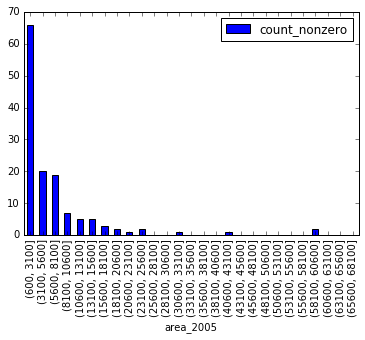

In [25]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(600, 70000, 2500)
area2005.groupby(pd.cut(area2005, bins)).agg([count_nonzero]).plot(kind='bar')


# Looking at trends and correlations

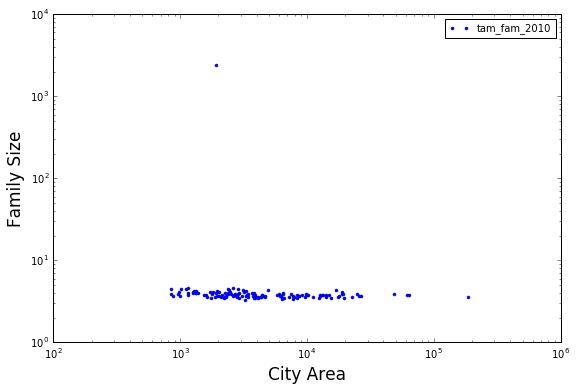

In [39]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)

pl.loglog(area2010, fam2010, '.')
pl.xlabel('City Area', fontsize=17)
pl.ylabel('Family Size', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

# Simple linear regression

In [40]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 

In [46]:
#Iarea
d = {'x': area2010, 'a': moto2010, 'b': fam2010, 'c': rem2009, 'd': sub2010}
# Run regression and print summary
mod = smf.ols(formula='x ~ a + b + c + d', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     6.128
Date:                Tue, 12 Apr 2016   Prob (F-statistic):           0.000151
Time:                        21:38:05   Log-Likelihood:                -1492.1
No. Observations:                 134   AIC:                             2994.
Df Residuals:                     129   BIC:                             3009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -819.8502   4707.404     -0.174      0.8

# To do
- Ver como estan distruibuidos los datos

- Escoger pruebas de correlación


# Subsidios federales

In [1]:
#ale los consigue- descargar tambien la de datos

# Taza motorización

In [2]:
#tenemos en inegi

# Ingreso

In [3]:
#en datos remuneraciones

# Restricciones a la densidad 
Por ejemplo, lotes minimos estacionamiento minimo
binario 1 o 0 
ponderaciones
normativa

## Tamaño familiar
De Censo Nacional de Población y Vivienda, 2010

In [17]:
pobexp = pd.read_csv('pobexp1.csv')
pobexp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ZM del Valle de México,NaN,NaN,NaN,NaN,^ Indice Principal,NaN,^ Indice Municipios,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,16 Delegaciones del Distrito Federal,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1,Municipio de Hidalgo,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,59,Municipios del Estado de México,NaN,NaN,NaN
4,Viviendas particulares habitadas por número de...,NaN,NaN,NaN,NaN,Vialidades y motorización,NaN,NaN,NaN,NaN


In [19]:
import csv

removal_list = set()
with open('pobexp1.csv', 'rb') as file_b:
    reader1 = csv.reader(file_b)
    next(reader1)
    for row in reader1:
        removal_list.add((row[0], row[2]))

<closed file 'pobexp1.csv', mode 'rb' at 0x118d7be40>